# MEMORY MODEL FOR HLS WITH FPGAs 

#### Please, run each cell sequentially. 
#### We shows for each LSU type
#### 1) Measurements captured from profiler and Report Files and the figures generated for the paper.
#### 2) Model estimation, and dependency analisys described in the paper

## Burst Coalesced Aligned

In [966]:
import pandas as pd

mc1 = pd.read_csv("Coalesced_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mc1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,BW write,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/s)
0,1,2,475.0,0.0,3800.0,0,16,0.00,0.57,34.56,Coalesced,0,0,1,64,108,3800.00
1,1,4,460.0,0.0,7586.7,0,15,0.37,2.45,17.33,Coalesced,0,0,1,128,108,7586.70
2,1,8,445.0,0.0,12672.4,0,15,49.41,2.45,9.27,Coalesced,0,0,1,256,108,12672.40
3,1,16,468.8,0.0,12556.0,0,15,52.54,2.45,9.30,Coalesced,0,0,1,512,108,12556.00
4,2,2,475.0,4274.0,3799.0,15,6,1.00,2.45,34.56,Coalesced,1,64,1,64,645,7585.19
5,2,4,470.0,5972.0,5811.0,15,13,1.21,2.45,21.71,Coalesced,1,128,1,128,645,12074.80
6,2,8,460.0,6807.0,6807.0,15,17,2.00,2.45,19.52,Coalesced,1,256,1,256,645,13429.51
7,2,16,466.7,7007.0,7007.0,15,18,1.47,2.96,18.37,Coalesced,1,512,1,512,645,14270.22
8,3,2,462.5,3075.7,2798.1,12,6,3.18,1.60,48.02,Coalesced,2,64,1,64,650,8722.00
9,3,4,441.7,3779.3,3779.3,15,12,2.23,1.73,35.84,Coalesced,2,128,1,128,650,10942.20


In [8]:
#Import and set the label in figures
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
colorcycle = ['#525564','#96c0ce','#df9850','#c25B56','#beb9b5','#dfBA87']
marker_data=['v','X','o','D','s']
fs=12

BW_1866=14928 #bytes/s
group = ("#ga=1", "#ga=2", "#ga=3", "#ga4", "#ga5")
width = ("64", "128", "256", "512")
fs=12
r=1
c=1

## Model Burst Coalesced Aligned GMI

### We model the memory based on description of the hld/ips of altera. 

/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/Users/angelica/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/angelica/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/angelica/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.u

-0.3430437875738554


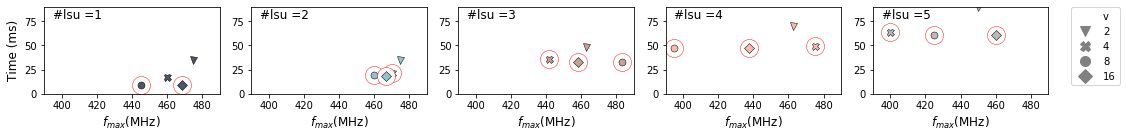

In [952]:
#Frequency Dependency graph
from matplotlib.ticker import FormatStrFormatter
r=1
c=5
fig1, ax1 = plt.subplots(r,c, figsize=(18,1.6))
plt.subplots_adjust(hspace=0.45,wspace=0.15)
# i=0
group = ['#lsu =1', "#lsu =2", "#lsu =3", "#lsu =4", "#lsu =5"]
groupW = ["v","2", "4", "8", "16"]
min_frq=np.min(mc1.get("Frequency (MHz)"))

plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
for i in range (0,5):   
    plt.subplot(r,c,i+1)
    for j in range (0,4):
    
        if (bin[i*4+j]==1):
            plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color='white',
              marker=marker_data[2],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='red',
              markersize=18,
              alpha=0.9        
                 )
        
        plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
              markersize=7
                 )
        plt.xlim([390, 490])
        plt.ylim([0, 90])

    plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$f_{max}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)
#
#plt.subplot(r,c,3)

custom_lines=                 [
              Line2D([0],[0],linestyle=""),
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='grey',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='grey',lw=1,markersize=10),
             ]
#ax1
cont=np.concatenate([groupW])
#plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))
plt.legend(custom_lines,cont,loc=2,bbox_to_anchor=(1.1, 1.05))
#plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(2, 1.05))

plt.savefig('Frq_dep.pdf',bbox_inches="tight")

factor_c=mc1.loc[:, "Time (ms)"]/mc1.loc[:, "Frequency (MHz)"]

import math

def average(x):
       assert len(x) > 0
       return float(sum(x)) / len(x)

def pearson_def(x, y):
       assert len(x) == len(y)
       n = len(x)
       assert n > 0
       avg_x = average(x)
       avg_y = average(y)
       diffprod = 0
       xdiff2 = 0
       ydiff2 = 0
       for idx in range(n):
           xdiff = x[idx] - avg_x
           ydiff = y[idx] - avg_y
           diffprod += xdiff * ydiff
           xdiff2 += xdiff * xdiff
           ydiff2 += ydiff * ydiff

       return diffprod / math.sqrt(xdiff2 * ydiff2)
R=pearson_def(mc1.get("Frequency (MHz)")*1e6, mc1.get("Time (ms)"))

print(R)



/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


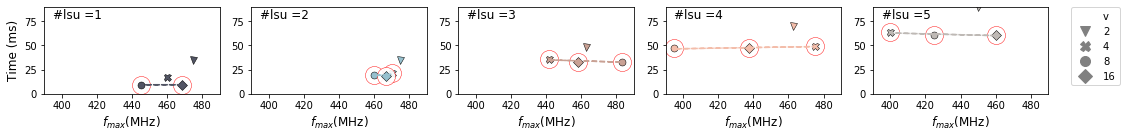

In [984]:
#Frequency Dependency graph
from matplotlib.ticker import FormatStrFormatter
r=1
c=5
fig1, ax1 = plt.subplots(r,c, figsize=(18,1.6))
plt.subplots_adjust(hspace=0.45,wspace=0.15)
# i=0
group = ['#lsu =1', "#lsu =2", "#lsu =3", "#lsu =4", "#lsu =5"]
groupW = ["v","2", "4", "8", "16"]
min_frq=np.min(mc1.get("Frequency (MHz)"))

plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
x=np.ones(4)
y=np.ones(4)
for i in range (0,5):   
    plt.subplot(r,c,i+1)
    for j in range (0,4):
    
        if (bin[i*4+j]==1):
            plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color='white',
              marker=marker_data[2],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='red',
              markersize=18,
              alpha=0.9        
                 )
            x[j]=mc1.loc[[i*4+j], "Frequency (MHz)"]
            y[j]=mc1.loc[[i*4+j], "Time (ms)"]
        else: 
            x[j]=mc1.loc[[i*4+3], "Frequency (MHz)"]
            y[j]=mc1.loc[[i*4+3], "Time (ms)"] 
        plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
              markersize=7
                 )
        plt.xlim([390, 490])
        plt.ylim([0, 90])
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),color=colorcycle[i],linestyle="--")
    #plt.plot (x,y)
    plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$f_{max}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)



custom_lines=                 [
              Line2D([0],[0],linestyle=""),
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='grey',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='grey',lw=1,markersize=10),
             ]
#ax1
cont=np.concatenate([groupW])
#plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))
plt.legend(custom_lines,cont,loc=2,bbox_to_anchor=(1.1, 1.05))
#plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(2, 1.05))

plt.savefig('Frq_dep.pdf',bbox_inches="tight")

factor_c=mc1.loc[:, "Time (ms)"]/mc1.loc[:, "Frequency (MHz)"]





[0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
[445.  468.8 470.  460.  466.7 441.7 483.3 458.3 475.  395.  437.5 400.
 425.  460. ]
[ 9.27  9.3  21.71 19.52 18.37 35.84 33.26 33.27 49.63 47.18 46.9  63.56
 60.5  60.36]
-0.5126401500227566
-2.068285819424591


(array([4., 1., 3., 3., 3.]),
 array([ 9.27 , 20.128, 30.986, 41.844, 52.702, 63.56 ]),
 <a list of 5 Patch objects>)

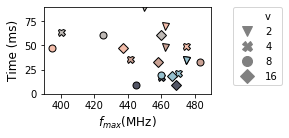

In [933]:
#Frequency Dependency graph
# Import seaborn
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
r=1
c=1
fig1, ax1 = plt.subplots(r,c, figsize=(3,1.6))
plt.subplots_adjust(hspace=0.45,wspace=0.15)
# i=0
group = ['#lsu =1', "#lsu =2", "#lsu =3", "#lsu =4", "#lsu =5"]
groupW = ["v","2", "4", "8", "16"]
min_frq=np.min(mc1.get("Frequency (MHz)"))

plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
for i in range (0,5):   
    #plt.subplot(r,c,i+1)
    for j in range (0,4):
    
        if (bin[i*4+j]==1):
            plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color='white',
              marker=marker_data[2],
              linestyle="",
              markeredgewidth=0.5,
              #markeredgecolor ='red',
              #markersize=18,
              alpha=0.9        
                 )
        
        plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              #markeredgewidth=0.5,
              markeredgecolor ='black',
              markersize=7
                 )
        plt.xlim([390, 490])
        plt.ylim([0, 90])

    #plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$f_{max}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)
#
#plt.subplot(r,c,3)

custom_lines=                 [
              Line2D([0],[0],linestyle=""),
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='grey',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='grey',lw=1,markersize=10),
             ]
#ax1
cont=np.concatenate([groupW])
#plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))
plt.legend(custom_lines,cont,loc=2,bbox_to_anchor=(1.1, 1.05))
#plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(2, 1.05))

plt.savefig('Frq_scatter.pdf',bbox_inches="tight")

factor_c=mc1.loc[:, "Time (ms)"]/mc1.loc[:, "Frequency (MHz)"]

import math

def average(x):
       assert len(x) > 0
       return float(sum(x)) / len(x)

def pearson_def(x, y):
       assert len(x) == len(y)
       n = len(x)
       assert n > 0
       avg_x = average(x)
       avg_y = average(y)
       diffprod = 0
       xdiff2 = 0
       ydiff2 = 0
       for idx in range(n):
           xdiff = x[idx] - avg_x
           ydiff = y[idx] - avg_y
           diffprod += xdiff * ydiff
           xdiff2 += xdiff * xdiff
           ydiff2 += ydiff * ydiff

       return diffprod / math.sqrt(xdiff2 * ydiff2)
R=pearson_def(mc1.get("Frequency (MHz)")*1e6, mc1.get("Time (ms)"))

print (bin)
s_fr=mc1.get("Frequency (MHz)")
s_frq=s_fr.values
s_frq=np.delete(s_frq, [0,1,4,8,12,16])
print (s_frq)

s_time=mc1.get("Time (ms)")
s_time=s_time.values
s_time=np.delete(s_time, [0,1,4,8,12,16])
print(s_time)
R=pearson_def( s_time, s_frq)

print(R)

t_student= R/(np.sqrt((1-R*R)/(len(s_time)-2)))
print (t_student)




                 LOAD/STORE  Frequency (MHz)  Time (ms)  Width Units  \
LOAD/STORE         1.000000         0.250007   0.786454     0.000000   
Frequency (MHz)    0.250007         1.000000   0.117679     0.017946   
Time (ms)          0.786454         0.117679   1.000000     0.135171   
Width Units        0.000000         0.017946   0.135171     1.000000   
BW (MB/s)          0.000141         0.018172   0.157773     0.530511   

                 BW (MB/s)  
LOAD/STORE        0.000141  
Frequency (MHz)   0.018172  
Time (ms)         0.157773  
Width Units       0.530511  
BW (MB/s)         1.000000  


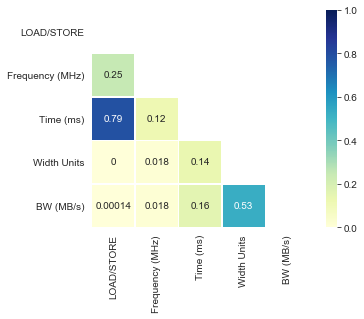

In [924]:
BCA=mc1
#BCA=BCA.drop(["BW (MB/s)"],axis=1)
BCA=BCA.drop(["BW read", "SIMD", "Stall Read (%)","Stall Write (%)","Avr. Write Burst","Avr. Read Burst"],axis=1)
BCA=BCA.drop(["BW write", "LD units", "ST Units", "Latency", "Width LD" ],axis=1)
BCA["Width Units"]=BCA["Width Units"].apply(lambda x: math.log(x,2))
#BCA["Frequency (MHz)"]=BCA["Frequency (MHz)"].apply(lambda x: 1/x)
#BCA["BW (MB/s)"]=BCA["BW (MB/s)"].apply(lambda x: 1/x)
corr = BCA.corr()
corr =corr *corr 
print (corr)
#sns.heatmap(corr, annot = True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,  cmap="YlGnBu", annot=True, linewidths=.5)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()


In [ ]:
¡
s_fr=mc1.get("Frequency (MHz)")
s_frq=s_fr.values
s_frq=np.delete(s_frq, [0,1,4,8,12,16])


s_time=mc1.get("Time (ms)")
s_time=s_time.values
s_time=np.delete(s_time, [0,1,4,8,12,16])


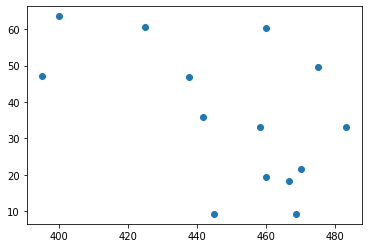

In [784]:

plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
plt.plot(s_frq, s_time, 'o')

In [913]:
group = ("Measured LD/ST=1", "Measured LD/ST=2", "Measured LD/ST=2", "Measured LD/ST=3", "Measured LD/ST=4")
group2 = ("Estimated LD/ST=1", "Estimated LD/ST=2", "Estimated LD/ST=2", "Estimated LD/ST=3", "Estimated LD/ST=4")
group = ("LSU=1", "LSU=2", "LSU=3", "LSU=4", "LSU=5")
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
title = ("", "LD/ST=2", "LD/ST=2", "LD/ST=3", "LD/ST=4")


LSU=mc1.get("LOAD/STORE")
WD=mc1.get("Width Units")
FRQ=mc1.get("Frequency (MHz)")*1e6
TIME=mc1.get("Time (ms)")
LATENCY=mc1.get("Latency")

BW=14928e6
# Fmem=2666e6
Fmem=1866e6
dqbl=64
K_width=64
burst_n=5

TRCD=13.5e-9
TRP =13.5e-9

WI=32768000
ls_bytes=4
delta=1

burst_size=2**(burst_n)*dqbl

Cco=np.ones(len(WD))
Cycles=Cco
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 
for i in range (0,len(WD)):
     T_ovh[i]=((LSU[i])/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
     if (LSU[i]<3):
        T_ovh[i]=0

     T_exe[i]=T_ideal[i]+T_ovh[i]*delta

max_burst= WD/8 *LSU /dqbl
#filter to graph only the memory bound part  
bin=(max_burst>=1)    
bin= np.multiply(bin,1)
#bin=np.ones(len(WD))

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print ("Estimated Error in Burst Coalesced Aligned \n",error)
print(sum(error*bin)/sum(bin))

Estimated Error in Burst Coalesced Aligned 
 0     100.000000
1     100.000000
2     100.000000
3       5.588401
4     100.000000
5     100.000000
6      10.038128
7       4.406329
8     100.000000
9     100.000000
10      5.216969
11      5.245458
12    100.000000
13     15.307043
14     10.909041
15     10.377154
16    100.000000
17     17.335756
18     13.154722
19     12.953291
dtype: float64
10.04839029263522


In [920]:
group = ("Measured LD/ST=1", "Measured LD/ST=2", "Measured LD/ST=2", "Measured LD/ST=3", "Measured LD/ST=4")
group2 = ("Estimated LD/ST=1", "Estimated LD/ST=2", "Estimated LD/ST=2", "Estimated LD/ST=3", "Estimated LD/ST=4")
group = ("LSU=1", "LSU=2", "LSU=3", "LSU=4", "LSU=5")
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
title = ("", "LD/ST=2", "LD/ST=2", "LD/ST=3", "LD/ST=4")


LSU=mc1.get("LOAD/STORE")
WD=mc1.get("Width Units")
FRQ=mc1.get("Frequency (MHz)")*1e6
TIME=mc1.get("Time (ms)")
LATENCY=mc1.get("Latency")

BW=14932e6
# Fmem=2666e6
Fmem=1866e6
dqbl=64
K_width=64
burst_n=5

#update
fmax=480e6
fmin=BW/dqbl*(dqbl*8/(WD))

print(fmin/1e6)
BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>fmax):
        if (LSU[i] == 1):
            BW[i]=BW[i]*(fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(fmax*2/fmin[i])
            #BW[i]=BW[i]*(fmax/(fmin[i]))
    if (BW[i]>14928e6):
        BW[i]=14928e6
print (BW)
###

TRCD=13.5e-9
TRP =13.5e-9

WI=32768000
ls_bytes=4
delta=1

burst_size=2**(burst_n)*dqbl

Cco=np.ones(len(WD))
Cycles=Cco
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 
for i in range (0,len(WD)):
     T_ovh[i]=((LSU[i])/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
     if (LSU[i]<3):
        T_ovh[i]=0

     T_exe[i]=T_ideal[i]+T_ovh[i]*delta

max_burst= WD/8 *LSU /dqbl
#filter to graph only the memory bound part  
bin=(max_burst>=1)  
bin=(BW>=(14928e6))  
bin= np.multiply(bin,1)
#bin=np.ones(len(WD))

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print ("Estimated Error in Burst Coalesced Aligned \n",error)


0     1866.5000
1      933.2500
2      466.6250
3      233.3125
4     1866.5000
5      933.2500
6      466.6250
7      233.3125
8     1866.5000
9      933.2500
10     466.6250
11     233.3125
12    1866.5000
13     933.2500
14     466.6250
15     233.3125
16    1866.5000
17     933.2500
18     466.6250
19     233.3125
Name: Width Units, dtype: float64
[3.8400e+09 7.6800e+09 1.4928e+10 1.4928e+10 7.6800e+09 1.4928e+10
 1.4928e+10 1.4928e+10 7.6800e+09 1.4928e+10 1.4928e+10 1.4928e+10
 7.6800e+09 1.4928e+10 1.4928e+10 1.4928e+10 7.6800e+09 1.4928e+10
 1.4928e+10 1.4928e+10]
Estimated Error in Burst Coalesced Aligned 
 0     100.000000
1     100.000000
2       5.282862
3       5.588401
4     100.000000
5      19.113048
6      10.038128
7       4.406329
8     100.000000
9      12.040078
10      5.216969
11      5.245458
12    100.000000
13     15.307043
14     10.909041
15     10.377154
16    100.000000
17     17.335756
18     13.154722
19     12.953291
Name: Time (ms), dtype: float64


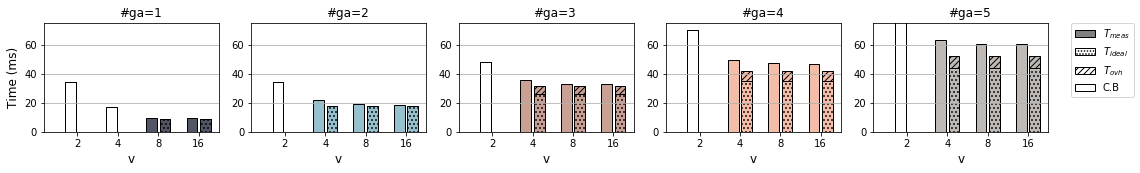

In [795]:
#Figures to paper showing the measured and estimated time
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    plt.ylim([0,75])
    plt.grid(axis='y')
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',color='grey',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'C.B',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_coalesced_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

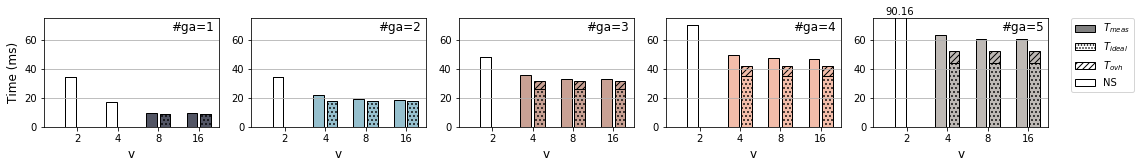

In [921]:
#Figures to paper showing the measured and estimated time
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)


for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.85,y=0.83,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
            
        
        if TIME[i*4+j]>75.0:
           plt.text(3,75+2,TIME[i*4+j],horizontalalignment='right')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    plt.ylim([0,75])
    plt.grid(axis='y')
    
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',color='grey',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_coalesced_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

0    -0.000000
1    -0.000000
2     0.441016
3     0.733633
4    -0.000000
5     0.007031
6     0.472266
7     0.729258
8    -0.000000
9    -0.051927
10    0.520807
11    0.711758
12   -0.000000
13    0.017448
14    0.336849
15    0.668424
16   -0.000000
17   -0.138802
18    0.399349
19    0.715299
dtype: float64
% of kernels under the estimated frequency
21.428571428571427


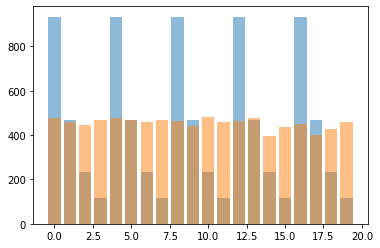

In [912]:
FRQ_BCA=mc1.get("Frequency (MHz)")
fmin_BCA=fmin/(1e6)
for i in range (0,5): 
    if(LSU[i]==2):
        fmin_BCA=fmin_BCA/2
error_f=(FRQ_BCA-fmin_BCA)/480*bin
print(error_f)

num=np.arange(0,len(FRQ_BCA))
plt.bar (num,fmin_BCA, alpha=0.5)
plt.bar (num,FRQ_BCA, alpha=0.5)
print("% of kernels under the estimated frequency")
print (3/sum(bin)*100)

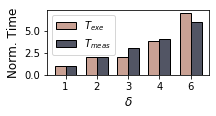

In [321]:
# testing the stride access
# for pair number the access generated are coalesced aligned
#this test is executed with #lsu=3

delta=[1, 2, 3, 4, 6]
deltaT_exe=[33.27,66.54, 67.97, 127.86,233.3]
ndeltaT_exe=np.divide(deltaT_exe,deltaT_exe[0])

x = [1,2,3,4,5]

fig1, ax1 = plt.subplots(1,1, figsize=(2.9,1.2))
width=0.35

plt.bar(np.add(x,-width/2),ndeltaT_exe, width, color=colorcycle[2],edgecolor='black' )
plt.xticks(x, delta) 
plt.bar(np.add(x,width/2),delta,width, color=colorcycle[0],edgecolor='black' )
plt.legend([r'$T_{exe}$',r'$T_{meas}$'])


plt.xlabel(r'$\delta$',fontsize=fs)
plt.ylabel("Norm. Time",fontsize=fs)

plt.savefig('Mem_model_coalesced_1866_delta.pdf', bbox_inches="tight")

## Burst Coalesced Non-Aligned

In [916]:
import pandas as pd
mn1 = pd.read_csv("NonAligned_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mn1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,BW write,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/S)
0,1,2,410.00,0.0,7603.0,8,0,1.97,0.95,55.04,Non-aligned,0,0,1,256,0,7599.6
1,1,4,406.20,0.0,11615.0,5,0,1.97,7.72,35.61,Non-aligned,0,0,1,512,0,11763.1
2,1,8,412.50,0.0,14237.0,11,0,1.97,46.07,18.86,Non-aligned,0,0,1,1024,0,12775.7
3,1,16,390.00,0.0,14239.0,15,0,1.97,42.95,27.71,Non-aligned,0,0,1,2048,0,12880.1
4,2,2,370.00,4726.0,4871.2,8,10,1.97,4.85,85.84,Non-aligned,1,256,1,256,0,9263.8
5,2,4,418.80,6031.3,6321.5,6,10,2.30,6.01,66.20,Non-aligned,1,512,1,512,0,11737.1
6,2,8,362.50,6750.3,6933.9,11,8,3.58,3.88,59.48,Non-aligned,1,1024,1,1024,0,13016.3
7,2,16,337.50,7635.2,6324.8,15,11,3.43,3.76,62.79,Non-aligned,1,2048,1,2048,0,13412.3
8,3,2,334.40,2955.5,2937.7,8,7,4.48,3.23,142.29,Non-aligned,2,256,1,256,240,8558.0
9,3,4,358.30,3255.5,3088.4,6,6,5.88,4.36,135.33,Non-aligned,2,512,1,512,240,9216.0


## Model Burst Coalesced Non-Aligned GMI

/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


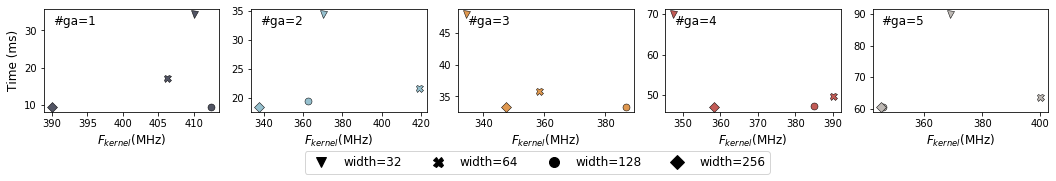

In [918]:
#Frequency Dependency
from matplotlib.ticker import FormatStrFormatter

colorcycle = ['#525564','#96c0ce','#df9850','#c25B56','#beb9b5','#dfBA87']

r=1
c=5
fig1, ax1 = plt.subplots(r,c, figsize=(18,1.9))
# i=0
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
groupW = ["width=32", "width=64", "width=128", "width=256"]


min_frq=np.min(mn1.get("Frequency (MHz)"))



plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
for i in range (0,5):   
    plt.subplot(r,c,i+1)
    for j in range (0,4):
        plt.plot (mn1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              #label=groupW[j],
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
#                   label=group[i],
              markersize=7
                 )
    plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$F_{kernel}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#     plt.legend()
#     plt.legend(custom_lines[0], group[0])
#         plt.xlim(right=490)
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)

plt.subplot(r,c,3)

custom_lines=                 [
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='black',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='black',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='black',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='black',lw=1,markersize=10),
             ]



#ax1
cont=np.concatenate([groupW])
plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(0.45, -0.32))

# plt.subplot(r,c,6)
# fig.patch.set_visible(False)
# plt.axis('off')

plt.savefig('Frq_dep_na.pdf',bbox_inches="tight")

In [676]:
LSU=mn1.get("LOAD/STORE")
WD=mn1.get("Width Units")
FRQ=mn1.get("Frequency (MHz)")*1e6
TIME=mn1.get("Time (ms)")

ST=mn1.get("LD units")
LD=mn1.get("ST Units")

BW=14928e6
print (BW)
Fmem=1866e6

burst_n=5

TRCD=13.5e-9
TRP=TRCD

WI=32768000
ls_bytes=4
delta=3
dq=8
bl=8

max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta+1)
max_word=np.zeros(len(WD))
for i in range (0,len(WD)):
    if(lim_th[i]<max_burst):
        max_word[i]=lim_th[i]
    else:
        max_word[i]=WD[i]

burst_size=max_word/delta
burst_size=64*np.ceil(np.divide(burst_size,64*np.ones(len(WD))))
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
     
     T_ovh[i]=((LSU[i])/(burst_size[i]))*((TRCD+TRP))*ls_bytes*WI
     
     if (LSU[i]<3):
        T_ovh[i]=0
     Tco = 0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

## IF the memory occupancy is low the number of cycles depends of kernel frequency
max_burst= WD/8 *LSU /(dq*bl  * delta)
bin=(max_burst>1)    
bin= np.multiply(bin,1)
#bin= np.add(bin,1)
Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*delta*bin*1000
T_ovh=T_ovh*delta*bin*1000

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)

14928000000.0
0      52.142376
1      26.029666
2      39.665090
3     180.235814
4      38.628061
5      20.420435
6     154.281587
7     135.605491
8      72.120675
9      19.682634
10    290.065077
11    179.666025
12      8.460924
13    177.132231
14    220.248784
15    155.302103
16     45.568911
17    128.769211
18    215.490503
19    162.647201
20     50.166239
21    112.171938
22    208.761180
23    165.618801
dtype: float64


In [917]:
LSU=mn1.get("LOAD/STORE")
WD=mn1.get("Width Units")
FRQ=mn1.get("Frequency (MHz)")*1e6
TIME=mn1.get("Time (ms)")

ST=mn1.get("LD units")
LD=mn1.get("ST Units")

BW=14928e6
Fmem=1866e6

burst_n=5

TRCD=13.5e-9
TRP=TRCD

WI=32768000
ls_bytes=4
delta=3
dq=8
bl=8

#update
fmax=480e6

fmin=(BW/(dq*bl))*(dq*bl*8/(WD))*delta

print(fmin/1e6)


BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>=fmax):
        if (LSU[i] == 1):
            BW[i]=BW[i]*(fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(2*fmax/(fmin[i]))
    if (BW[i]>14928e6 ):
        BW[i]=14928e6
print (BW/1e6)


max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta+1)
max_word=np.zeros(len(WD))
for i in range (0,len(WD)):
    if(lim_th[i]<max_burst):
        max_word[i]=lim_th[i]
    else:
        max_word[i]=WD[i]

burst_size=max_word/delta
burst_size=64*np.ceil(np.divide(burst_size,64*np.ones(len(WD))))
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
     
     T_ovh[i]=((LSU[i])/(burst_size[i]))*((TRCD+TRP))*ls_bytes*WI
     
     if (LSU[i]<3):
        T_ovh[i]=0
     Tco = 0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

## IF the memory occupancy is low the number of cycles depends of kernel frequency
max_burst= WD/8 *LSU /(dq*bl  * delta)
bin=(max_burst>1)  
bin=(BW>=14928e6)  
bin= np.multiply(bin,1)
#bin= np.add(bin,1)
#bin= np.ones(len(bin))
Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*delta*bin*1000
T_ovh=T_ovh*delta*bin*1000

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)
print(sum(error*bin)/sum(bin))

0     1399.5000
1      699.7500
2      349.8750
3      174.9375
4     1399.5000
5      699.7500
6      349.8750
7      174.9375
8     1399.5000
9      699.7500
10     349.8750
11     174.9375
12    1399.5000
13     699.7500
14     349.8750
15     174.9375
16    1399.5000
17     699.7500
18     349.8750
19     174.9375
20    1399.5000
21     699.7500
22     349.8750
23     174.9375
Name: Width Units, dtype: float64
[ 5120. 10240. 14928. 14928. 10240. 14928. 14928. 14928. 10240. 14928.
 14928. 14928. 10240. 14928. 14928. 14928. 10240. 14928. 14928. 14928.
 10240. 14928. 14928. 14928.]
0      0.000000
1      0.000000
2     39.665090
3      4.941047
4      0.000000
5     20.420435
6     11.429603
7     16.098627
8      0.000000
9     19.682634
10    22.516269
11     5.083494
12     0.000000
13     5.716942
14     5.062196
15    11.174474
16     0.000000
17    17.807697
18     3.872626
19     9.338200
20     0.000000
21    21.957015
22     2.190295
23     8.595300
Name: Time (ms), dtype: fl

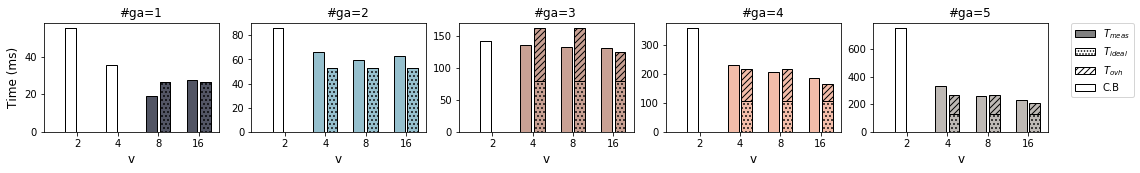

In [799]:
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
   
   # plt.yscale('log')
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'C.B',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_Nocoalesced_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

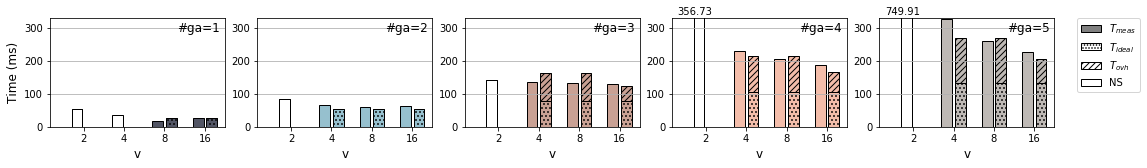

In [800]:
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.85,y=0.82,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        #external labels
 
        if TIME[i*4+j]>330.0:
           plt.text(3+j*3,330+10,TIME[i*4+j],horizontalalignment='right')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    plt.ylim([0,330])
    plt.grid(axis='y')
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_Nocoalesced_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

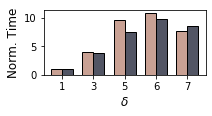

In [569]:
# testing the stride access
# for pair number the access generated are coalesced aligned
#this test is executed with #lsu=3

delta=[1,3, 5, 6, 7]
deltaT_exe=[33.2,130.9,318.1,362.43, 257.77]
ndeltaT_exe=np.divide(deltaT_exe,deltaT_exe[0])
estm=[31.5,124.3, 250.19, 323.93, 283.7]
estm=np.divide(estm,deltaT_exe[0])

x = [1,2,3,4,5]
width=0.35

fig1, ax1 = plt.subplots(1,1, figsize=(2.9,1.2))

plt.bar(np.add(x,-width/2),ndeltaT_exe, width, color=colorcycle[2],edgecolor='black' )
plt.xticks(x, delta) 
plt.bar(np.add(x,width/2),estm,width, color=colorcycle[0],edgecolor='black' )
plt.xlabel(r'$\delta$',fontsize=fs)
plt.ylabel("Norm. Time",fontsize=fs)

plt.savefig('Mem_model_Nocoalesced_1866_delta.pdf', bbox_inches="tight")


# Burst Coalesced Write Acknowledge


In [546]:
import pandas as pd
mw1 = pd.read_csv("writeAck_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mw1

,LOAD/STORE,SIMD,Frecuencia (MHz),BW read,BW write,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,width LD,ST Units,Width Units,Latency,BW (MB/S)
0,1,2,475.0,0.0,603.4,1,1,0.00,75.20,151.88,Write-ack,0,32,2,32,NaN,11954.8
1,1,4,450.0,0.0,392.8,1,1,0.00,86.80,153.75,Write-ack,0,32,4,32,NaN,11953.5
2,1,8,443.8,0.0,171.9,1,1,0.00,93.13,152.64,Write-ack,0,32,8,32,NaN,12046.1
3,1,16,458.3,0.0,852.3,1,1,0.00,96.51,152.71,Write-ack,0,32,16,32,NaN,12023.4
4,2,2,405.0,1827.9,1827.9,1,1,92.17,13.83,564.95,Write-ack,2,32,2,32,NaN,7020.7
5,2,4,475.0,1316.4,1316.4,1,1,95.73,9.78,396.10,Write-ack,4,32,4,32,NaN,9892.4
6,2,8,437.5,607.8,607.8,1,1,97.86,8.00,428.81,Write-ack,8,32,8,32,NaN,9162.2
7,2,16,387.5,295.3,295.3,1,1,98.79,5.80,441.09,Write-ack,16,32,16,32,NaN,9008.4
8,3,2,415.0,1553.3,1560.0,1,1,94.19,11.18,664.72,Write-ack,4,32,2,32,NaN,9013.0
9,3,4,412.5,885.2,885.2,1,1,96.76,9.68,588.93,Write-ack,8,32,4,32,NaN,10232.4


In [717]:
LSU=mw1.get("LOAD/STORE")
WD=mw1.get("Width Units")
WDst=mw1.get("width LD")
FRQ=mw1.get("Frecuencia (MHz)")*1e6
SIMD=mw1.get("SIMD")
TIME=mw1.get("Time (ms)")
LD=mw1.get("LD units")
ST=mw1.get("ST Units")

BW=14928e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=8
burst_n=5

TRCD=13.5e-9
TRP=TRCD
TWR=15e-9
WI=32768000
ls_bytes=4
delta=16

burst_size=2**(burst_n)*dq*bl
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))

T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
    #the burst coalesced aligned units
     T_ovh[i]=((LSU[i])/(burst_size))*((TRCD+TRP))*ls_bytes*WI
     T_ovh[i]+=((1)/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI
     #only one bank access
    # if (ST[i]<3 or LSU[i]<2):
    #    T_ovh[i]=0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)
#WD/8 to express in bytes
max_burst= WD/8 *(ST+LD) /(dq*bl)
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin*(delta)
T_ovh=T_ovh*1000 *bin*(delta)

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)

0      0.000000
1      0.000000
2      0.000000
3     38.262366
4      0.000000
5      0.000000
6     11.552222
7     14.014619
8      0.000000
9      0.000000
10    14.654603
11    11.108073
12     0.000000
13     7.073008
14    14.271939
15     4.593683
16     0.000000
17     9.327160
18    12.507892
19     0.641987
20     0.000000
21    13.786660
22    10.102329
23     2.116772
dtype: float64


In [804]:
LSU=mw1.get("LOAD/STORE")
WD=mw1.get("Width Units")
FRQ=mw1.get("Frecuencia (MHz)")*1e6
SIMD=mw1.get("SIMD")
TIME=mw1.get("Time (ms)")
LD=mw1.get("LD units")
ST=mw1.get("ST Units")

BW=14928e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=8
burst_n=5

TRCD=13.5e-9
TRP=TRCD
TWR=15e-9
WI=32768000
ls_bytes=4
delta=16

delta=16

#update
fmax=480e6

fmin=(BW/(dq*bl))*(dq*bl*8/(WD*SIMD))
print(fmin/1e6)

BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>fmax):
        if (LD[i] <= 1):
            BW[i]=BW[i]*(2*fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(2*fmax/(fmin[i]))
    if (BW[i]>14928e6 ):
        BW[i]=14928e6
print (BW/1e6)



burst_size=2**(burst_n)*dq*bl

T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))

T_ideal=LSU/BW *ls_bytes*WI 


for i in range (0,len(WD)):
     T_ovh[i]=((LSU[i])/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI
     #T_ovh[i]=((LD[i] + ST[i])/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI
     if (LSU[i]<2):
        T_ovh[i]=0
     Tco = 0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) 
        #*(delta)

max_burst= WD/8 *(ST+LD) /(dq*bl)
bin=(max_burst>=1)  
bin=(BW>=14928e6) 

bin= np.multiply(bin,1)
#bin= np.ones(len(bin))
print (bin)
Est_time = (T_exe)*1000 *bin*delta*bin
T_ideal=T_ideal*1000 *bin*(delta)*bin
T_ovh=T_ovh*1000 *bin*(delta)*bin

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)
print(sum(error*bin)/sum(bin))

0     1866.00
1      933.00
2      466.50
3      233.25
4     1866.00
5      933.00
6      466.50
7      233.25
8     1866.00
9      933.00
10     466.50
11     233.25
12    1866.00
13     933.00
14     466.50
15     233.25
16    1866.00
17     933.00
18     466.50
19     233.25
20    1866.00
21     933.00
22     466.50
23     233.25
dtype: float64
[ 7680. 14928. 14928. 14928.  7680. 14928. 14928. 14928.  7680. 14928.
 14928. 14928.  7680. 14928. 14928. 14928.  7680. 14928. 14928. 14928.
  7680. 14928. 14928. 14928.]
[0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
0      0.000000
1      8.627994
2      7.963536
3      8.005724
4      0.000000
5      7.350437
6     14.417827
7     16.800445
8      0.000000
9      6.529235
10    14.175651
11    10.609218
12     0.000000
13     4.679242
14    12.063615
15     2.136050
16     0.000000
17     5.859785
18     9.162149
19     3.157514
20     0.000000
21     9.757807
22     5.901303
23     6.888811
Name: Time (ms), dtype: float64
8.560352389

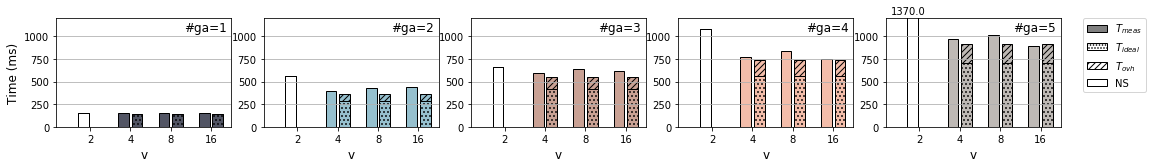

In [719]:
import matplotlib.patches as mpatches
r=1
c=5
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.85,y=0.82,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
            
        if TIME[i*4+j]>1200.0:
           plt.text(3+j*3,1200+40,TIME[i*4+j],horizontalalignment='right')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    plt.ylim([0, 1200])
    plt.grid(axis='y')
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))

plt.savefig('Mem_model_WriteAck_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

# Atomic-Pipeline LSU

In [455]:
import pandas as pd
ma1 = pd.read_csv("atomic_1866.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
ma1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,ATOMIC OPERATIONS,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Time (ms),Type of memory,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/s)
0,1,2,458.3,0.0,1,0,0,0.00,0,5113.700,atomic,0,0,1,32,185,0
1,1,4,458.3,0.0,1,0,0,0.00,0,2557.162,atomic,0,0,1,32,185,0
2,1,8,458.3,0.0,1,0,0,0.00,0,1278.800,atomic,0,0,1,32,185,0
3,1,16,458.3,0.0,1,0,0,0.00,0,639.260,atomic,0,0,1,32,185,0
4,2,2,370.0,37.0,1,0,0,58.21,0,10653.300,atomic,1,64,2,32,0,0
5,2,4,387.5,34.4,1,0,0,96.04,0,10542.600,atomic,1,128,4,32,0,0
6,2,8,391.7,21.7,1,0,0,81.08,0,10307.800,atomic,1,256,8,32,0,0
7,2,16,362.5,12.7,1,0,0,57.37,0,10360.800,atomic,1,512,16,32,0,0
8,3,2,375.0,21.6,2,0,0,89.68,0,21258.400,atomic,2,64,4,32,240,0
9,3,4,370.0,15.4,2,0,0,56.89,0,21324.950,atomic,2,128,8,32,240,0


In [806]:
LSU=ma1.get("LOAD/STORE")
WD=ma1.get("Width LD")
WDst=ma1.get("Width Units")
FRQ=ma1.get("Frequency (MHz)")*1e6
SIMD=ma1.get("SIMD")
TIME=np.divide(ma1.get("Time (ms)"),1000)
ST=ma1.get("ST Units")
LD=ma1.get("LD units")
#This is used to easy calculated the amount of bytes that are accessed by each LSU
Atom=ma1.get("ATOMIC OPERATIONS")
BW=14928e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=8
burst_n=5

TRCD=13.5e-9
TRP=TRCD
TWR=15.5e-9

WI=32768000
ls_bytes=4
delta=1

#update
fmax=480e6

#fmin=(BW/(dq*bl))*(dq*bl*8/((WD+WDst)*SIMD*LSU))

#update
fmax=480e6

fmin=(BW/(dq*bl))*(dq*bl*8/(32*SIMD*2))
print(fmin/1e6)

BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>fmax):
        if (LD[i] < 0):
            BW[i]=BW[i]*(2*fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(2*fmax/(fmin[i]))
   # if (BW[i]>14928e6 ):
   #     BW[i]=14928e6
print (BW/1e6)

burst_sizeAt=1
#burst size coalesced
burst_sizeC=2**(burst_n)*dq*bl*np.ones(len(WD))

T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
LSU=LD+ST
T_ideal=LSU/BW *ls_bytes*WI 


for i in range (0,len(WD)):
    #the burst coalesced aligned units
    # if (LD[i]>1):
    #    T_ovh[i]=((LD[i])/(burst_sizeC[i]))*((TRCD+TRP))*ls_bytes*WI
     T_ovh[i]+=((Atom[i])/(burst_sizeAt))*((2*TRCD+2*TRP+TWR))*ls_bytes*WI
     if (LSU[i]==1):
        T_ovh[i]=T_ovh[i]/SIMD[i]

     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

max_burst= np.ones(len(WD))
bin=(max_burst>=1)   
bin=(BW>=14928e6) 
#bin=np.ones(len(WD))
bin= np.multiply(bin,1)

Est_time = (T_exe)*bin
T_ideal=T_ideal *bin*(delta)
T_ovh=T_ovh*bin*(delta)
error= (np.abs(Est_time-TIME)/TIME)*100
print ("Estimation error:",error)
print(np.mean(error))

0     933.000
1     466.500
2     233.250
3     116.625
4     933.000
5     466.500
6     233.250
7     116.625
8     933.000
9     466.500
10    233.250
11    116.625
12    933.000
13    466.500
14    233.250
15    116.625
16    933.000
17    466.500
18    233.250
19    116.625
20    933.000
21    466.500
22    233.250
23    116.625
Name: SIMD, dtype: float64
[15360. 14928. 14928. 14928. 15360. 14928. 14928. 14928. 15360. 14928.
 14928. 14928. 15360. 14928. 14928. 14928. 15360. 14928. 14928. 14928.
 15360. 14928. 14928. 14928.]
Estimation error: 0     10.763531
1     10.597910
2     10.269919
3      9.563514
4     14.250946
5     13.176964
6     10.858510
7     10.636546
8     14.056524
9     14.153089
10    17.343015
11    11.639480
12    14.583499
13    15.680854
14    12.130377
15    13.980477
16    15.745311
17    16.734236
18    14.470039
19    16.767930
20    13.232043
21    14.935920
22    14.655535
23    16.808015
Name: Time (ms), dtype: float64
13.626424338617257


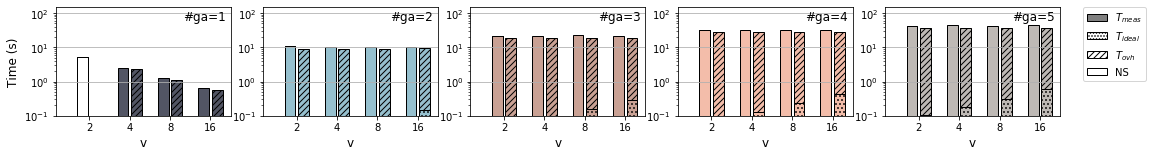

In [730]:
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(ma1.loc[[i*4+j], "Time (ms)"] , 1000),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.85,y=0.82,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(ma1.loc[[i*4+j], "Time (ms)"] , 1000),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                    # ,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(ma1.loc[[i*4+j], "Time (ms)"] , 1000),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (s)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    plt.yscale('log')
    plt.ylim([0.1,150])
    plt.grid(axis='y')
    plt.tick_params(which='minor')

a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))

plt.savefig('Mem_model_Atomic_1866_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100